## Agenda: (Saturday and Sunday)
1. Feature Engineering
2. Cross-validation
3. Handling Imbalance Problem
4. Data Pipelining 
5. Model Extraction

## <center>Consumer Electronics Sales Customer-intent-Prediction</center>

### Data info

#### Description:

This dataset provides insights into consumer electronics sales, featuring product categories, brands, prices, customer demographics, purchase behavior, and satisfaction metrics.

#### Project Description: 

#### Aim: 
It aims to analyze factors influencing purchase intent and customer satisfaction in the consumer electronics market.

#### Objective:
The objective of this project is to build a predictive model that can accurately forecast the likelihood of a customer intending to purchase a consumer electronics product. By analyzing customer demographics, product characteristics, and customer satisfaction, the model aims to identify patterns and factors that influence purchase intent. This will aid in creating targeted marketing strategies, enhancing customer experiences, and optimizing product offerings for increased sales.

#### Features:
* ProductID: Unique identifier for each product.
* ProductCategory: Category of the consumer electronics product (e.g., - Smartphones, Laptops).
* ProductBrand: Brand of the product (e.g., Apple, Samsung).
* ProductPrice: Price of the product ($).
* CustomerAge: Age of the customer.
* CustomerGender: Gender of the customer (0 - Male, 1 - Female).
* PurchaseFrequency: Average number of purchases per year.
* CustomerSatisfaction: Customer satisfaction rating (1 - 5).
* PurchaseIntent (Target Variable): Intent to purchase.


#### Goals:

1. Data Analysis: Explore relationships among product attributes, customer demographics, and satisfaction to understand key drivers of purchase intent.

2. Modeling: Develop a machine learning model to predict PurchaseIntent, helping identify high-potential customers for targeted promotions.

3. Feature Importance: Analyze feature importance to determine the factors that most significantly impact the intent to purchase.

4. Optimization: Provide actionable insights to optimize marketing and sales strategies based on predictive analytics.


#### Conclusion:
This dataset facilitates analysis on consumer behavior and purchase patterns in the consumer electronics sector, aiding insights into market dynamics and customer preferences.

In [1]:
#import necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_column', None)
import seaborn as sns

In [2]:
#Loading dataset
df = pd.read_csv('consumer_electronics_sales_data.csv')
df.head()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,5875,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,5876,Tablets,Samsung,2606.718293,63,0,1,5,1
3,5877,Smartphones,Samsung,870.395450,63,1,10,3,1
4,5878,Tablets,Sony,1798.955875,57,0,17,3,0


In [3]:
#EXploratory Data Analysis

In [3]:
df.shape

(9000, 9)

In [4]:
df.nunique()

ProductID               9000
ProductCategory            5
ProductBrand               5
ProductPrice            9000
CustomerAge               52
CustomerGender             2
PurchaseFrequency         19
CustomerSatisfaction       5
PurchaseIntent             2
dtype: int64

In [5]:
# checking for column info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductID             9000 non-null   int64  
 1   ProductCategory       9000 non-null   object 
 2   ProductBrand          9000 non-null   object 
 3   ProductPrice          9000 non-null   float64
 4   CustomerAge           9000 non-null   int64  
 5   CustomerGender        9000 non-null   int64  
 6   PurchaseFrequency     9000 non-null   int64  
 7   CustomerSatisfaction  9000 non-null   int64  
 8   PurchaseIntent        9000 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 632.9+ KB


In [8]:
#dropping the ProductID column

In [7]:

df2 = df.drop(columns=['ProductID'])

In [8]:
df2.head()

,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,Tablets,Samsung,2606.718293,63,0,1,5,1
3,Smartphones,Samsung,870.395450,63,1,10,3,1
4,Tablets,Sony,1798.955875,57,0,17,3,0


In [9]:
#checking for missing values

In [10]:
df2.isna().sum()

ProductCategory         0
ProductBrand            0
ProductPrice            0
CustomerAge             0
CustomerGender          0
PurchaseFrequency       0
CustomerSatisfaction    0
PurchaseIntent          0
dtype: int64

In [11]:
# checkinig for duplicates
df2.duplicated().sum()

0

In [12]:
#Analysing our Features

In [13]:
# Visualizing the Categorical Features

<Axes: xlabel='ProductBrand', ylabel='count'>

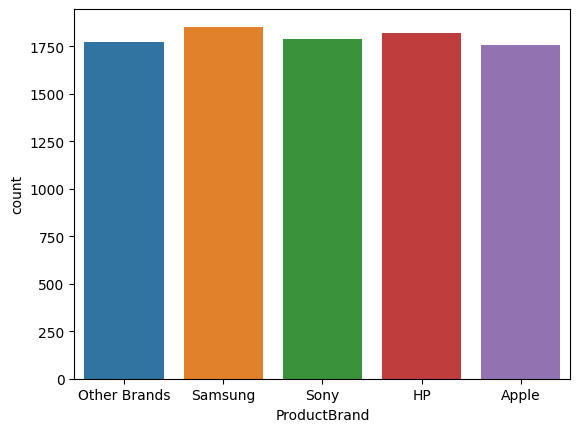

In [14]:
# ProductBrand
sns.countplot(x='ProductBrand', data=df2)

In [15]:
df2.ProductBrand.value_counts()

ProductBrand
Samsung         1854
HP              1820
Sony            1790
Other Brands    1776
Apple           1760
Name: count, dtype: int64

**Inference:**
* from the above the samsong product is mostly present in our dataset
* Also they are kind of uniformly arranged

<Axes: xlabel='ProductCategory', ylabel='count'>

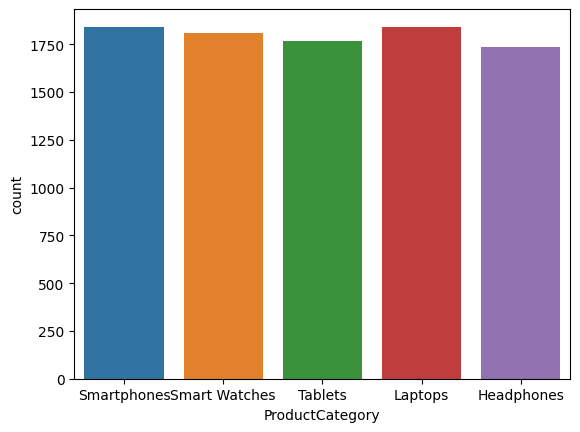

In [16]:
# ProductCategory
sns.countplot(x='ProductCategory', data=df2)

In [17]:
df2.ProductCategory.value_counts()

ProductCategory
Laptops          1842
Smartphones      1841
Smart Watches    1810
Tablets          1769
Headphones       1738
Name: count, dtype: int64

<Axes: xlabel='CustomerGender', ylabel='count'>

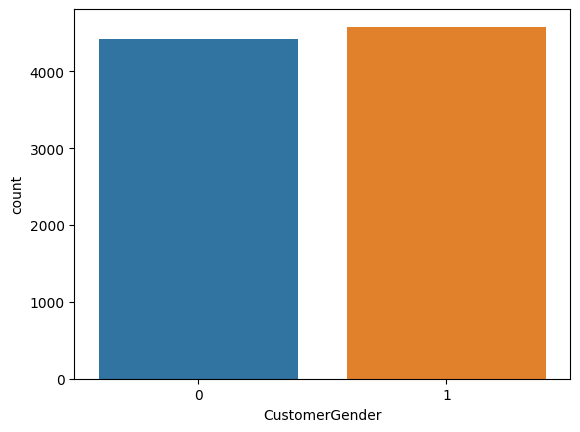

In [18]:
#CustomerGender
sns.countplot(x='CustomerGender', data=df2)

In [19]:
df.CustomerGender.value_counts()

CustomerGender
1    4580
0    4420
Name: count, dtype: int64

<Axes: xlabel='CustomerSatisfaction', ylabel='count'>

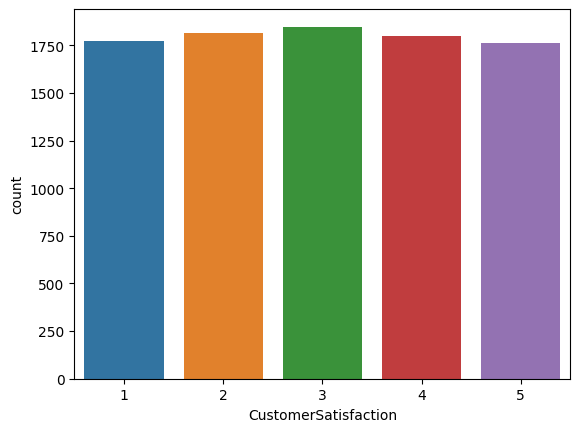

In [20]:
#CustomerSatisfaction
sns.countplot(x='CustomerSatisfaction', data=df2)

<Axes: xlabel='PurchaseIntent', ylabel='count'>

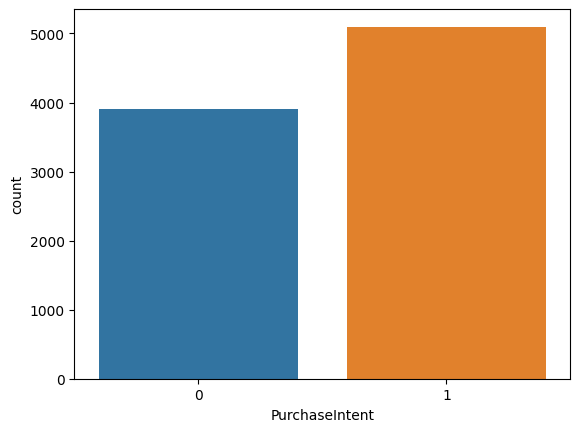

In [21]:
#PurchaseIntent
sns.countplot(x='PurchaseIntent', data=df2)

In [22]:
#visualizing the numeric features 

<Axes: xlabel='ProductPrice', ylabel='Count'>

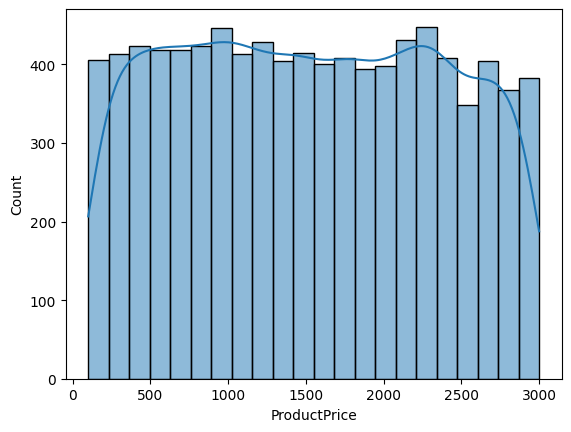

In [23]:
#ProductPrice          
sns.histplot(df2.ProductPrice, kde=True)

<Axes: xlabel='CustomerAge', ylabel='Count'>

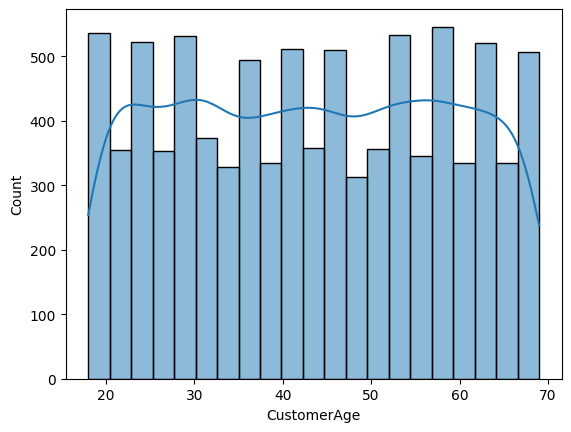

In [24]:
#CustomerAge
sns.histplot(df2.CustomerAge, kde=True)

In [25]:
df2.CustomerAge.skew()

0.0035197010790896767

<Axes: xlabel='PurchaseFrequency', ylabel='count'>

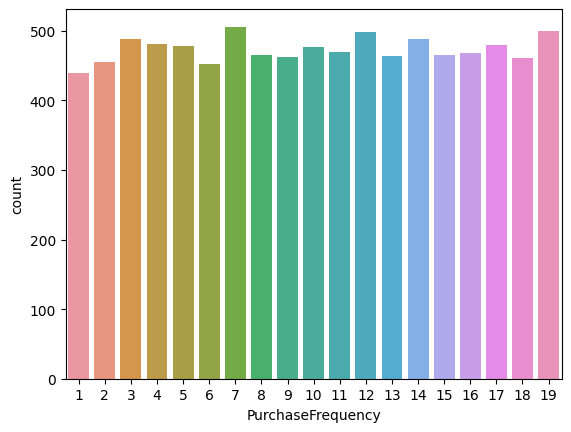

In [26]:
#PurchaseFrequency
sns.countplot(x='PurchaseFrequency', data=df2)

In [27]:
# Understanding the relationship of the feature to the PurchaseIntent

In [28]:
# CustomerAge vs PurchaseIntent
# CustomerGender vs PurchaseIntent
# PurchaseFrequency vs PurchaseIntent
# CustomerSatisfaction vs PurchaseIntent
# ProductPrice vs PurchaseIntent
# ProductBrand vs PurchaseIntent
# ProductCategory vs PurchaseIntent

In [29]:
# CustomerAge vs PurchaseIntent
cross_tab = pd.crosstab(df2['CustomerAge'], df2['PurchaseIntent'])
cross_tab

PurchaseIntent,0,1
CustomerAge,,
18,116,60
19,128,46
20,156,31
21,150,47
22,126,32
23,150,45
24,143,38
25,119,28
26,128,53


<Axes: xlabel='CustomerAge', ylabel='Density'>

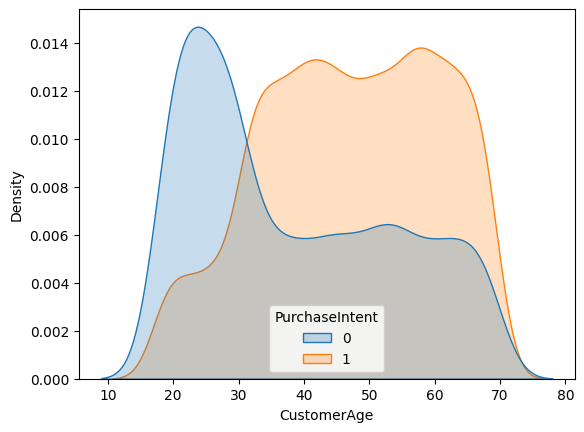

In [30]:
sns.kdeplot(x='CustomerAge', data=df2, hue='PurchaseIntent', fill=True)

inconclusion, as age increase the purchase intent also increase

In [31]:
#CustomerGender vs PurchaseIntent
cross_tab = pd.crosstab(df2['CustomerGender'], df2['PurchaseIntent'])
cross_tab

PurchaseIntent,0,1
CustomerGender,,
0,3041,1379
1,861,3719


<Axes: xlabel='CustomerGender', ylabel='count'>

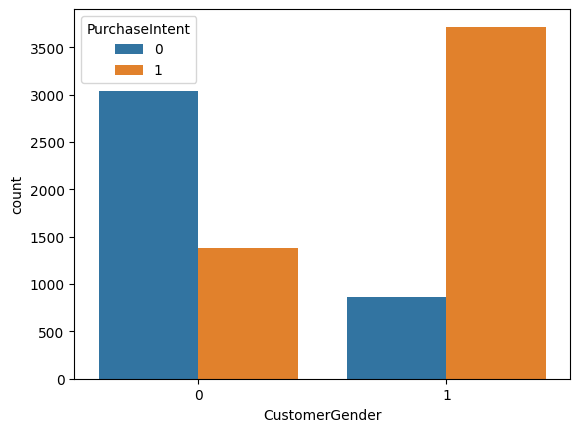

In [32]:
sns.countplot(x='CustomerGender', data=df2, hue='PurchaseIntent')

In [33]:
#PurchaseFrequency vs PurchaseIntent
cross_tab = pd.crosstab(df2['PurchaseFrequency'], df2['PurchaseIntent'])
cross_tab

PurchaseIntent,0,1
PurchaseFrequency,,
1,182,257
2,199,256
3,213,275
4,195,286
5,220,258
6,191,261
7,219,287
8,209,257
9,200,263


<Axes: xlabel='PurchaseFrequency', ylabel='Density'>

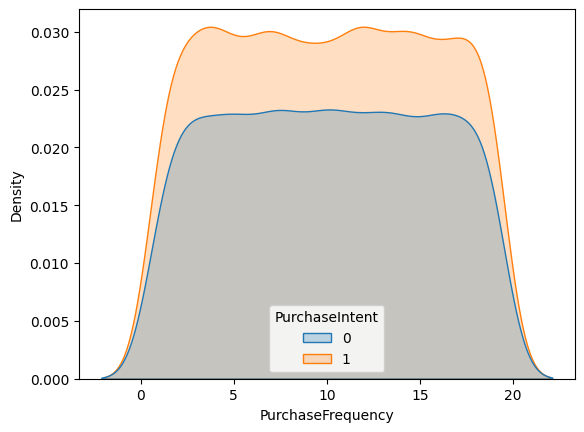

In [34]:
sns.kdeplot(x='PurchaseFrequency', data=df2, hue='PurchaseIntent', fill=True)

In [35]:
#CustomerSatisfaction vs PurchaseIntent
cross_tab = pd.crosstab(df['CustomerSatisfaction'], df['PurchaseIntent'])
cross_tab

PurchaseIntent,0,1
CustomerSatisfaction,,
1,1091,684
2,1108,706
3,1152,696
4,279,1519
5,272,1493


<Axes: xlabel='CustomerSatisfaction', ylabel='count'>

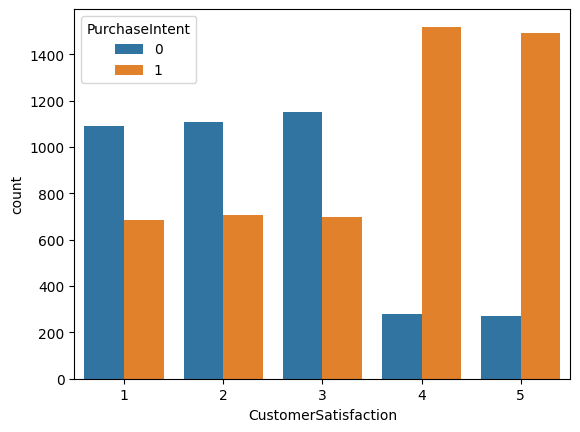

In [36]:
sns.countplot(x='CustomerSatisfaction', data=df2, hue='PurchaseIntent')

<Axes: xlabel='PurchaseIntent', ylabel='ProductPrice'>

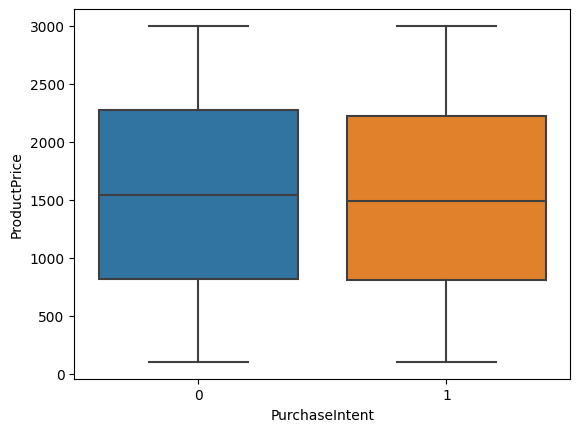

In [37]:
#ProductPrice vs PurchaseIntent

sns.boxplot(x='PurchaseIntent', y='ProductPrice', data=df2)

<Axes: xlabel='ProductPrice', ylabel='Count'>

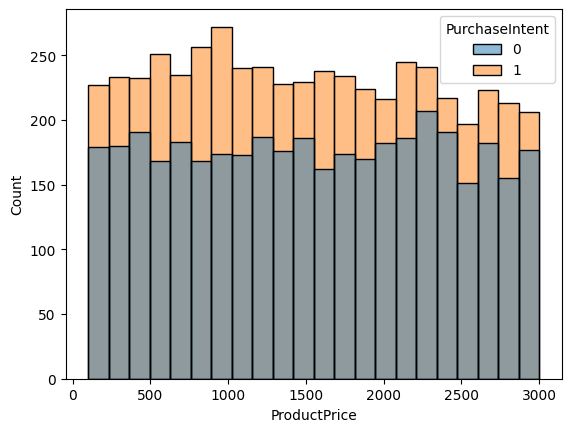

In [38]:
sns.histplot(x='ProductPrice', data=df2, hue='PurchaseIntent')

In [39]:
# ProductBrand vs PurchaseIntent


In [40]:
# ProductCategory vs PurchaseIntent

### Data Cleaning 

In [41]:
# checking for missing values
df2.isnull().sum()

ProductCategory         0
ProductBrand            0
ProductPrice            0
CustomerAge             0
CustomerGender          0
PurchaseFrequency       0
CustomerSatisfaction    0
PurchaseIntent          0
dtype: int64

In [42]:
# checking for duplicates
df2.duplicated().sum()

0

In [43]:
df2.columns

Index(['ProductCategory', 'ProductBrand', 'ProductPrice', 'CustomerAge',
       'CustomerGender', 'PurchaseFrequency', 'CustomerSatisfaction',
       'PurchaseIntent'],
      dtype='object')

In [44]:
cols = ['ProductPrice', 'CustomerAge', 'PurchaseFrequency',]

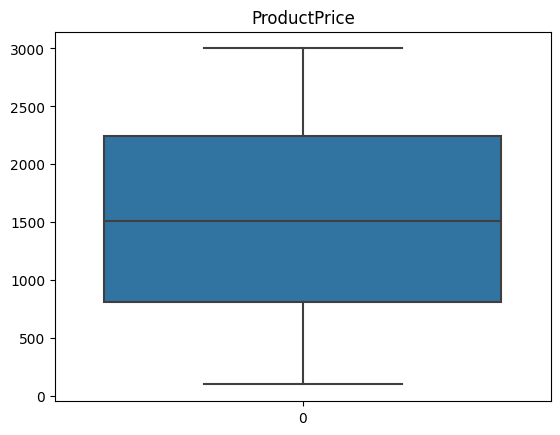

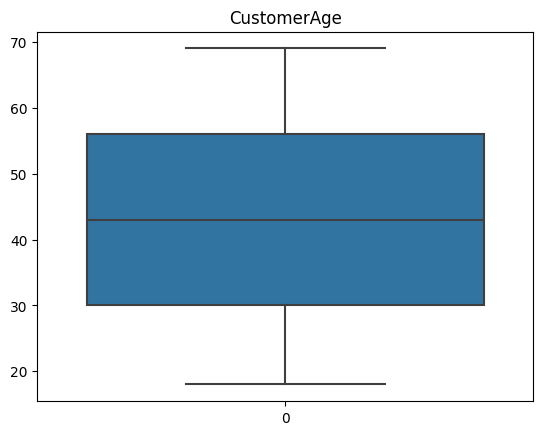

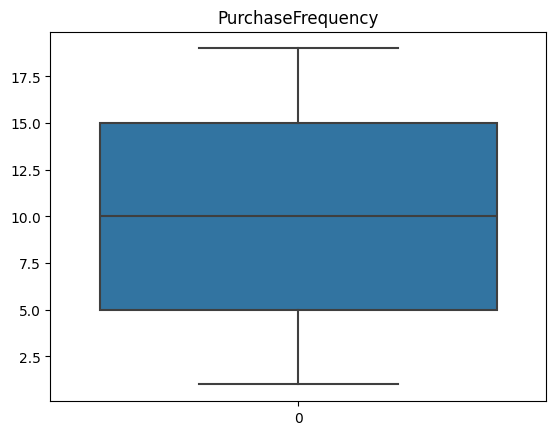

In [45]:
# checking for outliers
# using boxplot
for col in cols:
    sns.boxplot(df2[col])
    plt.title(f'{col}')
    plt.show()

### Preprocessing 

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductCategory       9000 non-null   object 
 1   ProductBrand          9000 non-null   object 
 2   ProductPrice          9000 non-null   float64
 3   CustomerAge           9000 non-null   int64  
 4   CustomerGender        9000 non-null   int64  
 5   PurchaseFrequency     9000 non-null   int64  
 6   CustomerSatisfaction  9000 non-null   int64  
 7   PurchaseIntent        9000 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 562.6+ KB


In [47]:
# encoding the categorical columns, i.e ProductCategory and ProductBrand

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [48]:
encoder = LabelEncoder()

In [49]:
productCat = encoder.fit_transform(df2['ProductCategory'])
productBrand = encoder.fit_transform(df2['ProductBrand'])

In [50]:
productCat

array([3, 2, 4, ..., 0, 4, 3])

In [51]:
df2['ProductCategory']

0         Smartphones
1       Smart Watches
2             Tablets
3         Smartphones
4             Tablets
            ...      
8995    Smart Watches
8996      Smartphones
8997       Headphones
8998          Tablets
8999      Smartphones
Name: ProductCategory, Length: 9000, dtype: object

In [52]:
productBrand

array([2, 3, 3, ..., 3, 1, 4])

In [55]:
df2['ProductBrand']

0       Other Brands
1            Samsung
2            Samsung
3            Samsung
4               Sony
            ...     
8995         Samsung
8996         Samsung
8997         Samsung
8998              HP
8999            Sony
Name: ProductBrand, Length: 9000, dtype: object

In [53]:
# adding our encoded columns to the dataframe
df2['product_brand_enc'] = productBrand
df2['product_cat_enc'] = productCat

In [54]:
df2

,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent,product_brand_enc,product_cat_enc
0,Smartphones,Other Brands,312.949668,18,0,2,1,0,2,3
1,Smart Watches,Samsung,980.389404,35,1,7,2,1,3,2
2,Tablets,Samsung,2606.718293,63,0,1,5,1,3,4
3,Smartphones,Samsung,870.395450,63,1,10,3,1,3,3
4,Tablets,Sony,1798.955875,57,0,17,3,0,4,4
...,...,...,...,...,...,...,...,...,...,...
8995,Smart Watches,Samsung,1041.149163,36,1,16,4,0,3,2
8996,Smartphones,Samsung,1485.694311,57,0,5,1,1,3,3
8997,Headphones,Samsung,2887.369597,28,0,18,4,0,3,0
8998,Tablets,HP,1490.453964,38,0,4,2,1,1,4


In [55]:
df3 = df2.drop(columns=['ProductCategory','ProductBrand'])
df3


,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent,product_brand_enc,product_cat_enc
0,312.949668,18,0,2,1,0,2,3
1,980.389404,35,1,7,2,1,3,2
2,2606.718293,63,0,1,5,1,3,4
3,870.395450,63,1,10,3,1,3,3
4,1798.955875,57,0,17,3,0,4,4
...,...,...,...,...,...,...,...,...
8995,1041.149163,36,1,16,4,0,3,2
8996,1485.694311,57,0,5,1,1,3,3
8997,2887.369597,28,0,18,4,0,3,0
8998,1490.453964,38,0,4,2,1,1,4


In [56]:
#scaling our dataset
#from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer

In [57]:
#scaler = StandardScaler()

In [58]:
#df3['ProductPrice'] = scaler.fit_transform(df3[['ProductPrice']])

In [59]:
#scaled_price

### Feature Engineering

In [60]:
#CustomerAge, CustomerGender, CustomerSatisfaction

In [61]:
df3.corr()

,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent,product_brand_enc,product_cat_enc
ProductPrice,1.000000,-0.009322,0.001835,0.009281,0.002112,-0.017512,0.012437,-0.019288
CustomerAge,-0.009322,1.000000,-0.010767,0.005746,0.003753,0.289798,-0.004649,0.012900
CustomerGender,0.001835,-0.010767,1.000000,-0.008643,0.007959,0.504412,-0.029625,0.006489
PurchaseFrequency,0.009281,0.005746,-0.008643,1.000000,0.020603,-0.001465,0.017497,-0.024154
CustomerSatisfaction,0.002112,0.003753,0.007959,0.020603,1.000000,0.391133,-0.020234,-0.002354
PurchaseIntent,-0.017512,0.289798,0.504412,-0.001465,0.391133,1.000000,-0.022632,0.010940
product_brand_enc,0.012437,-0.004649,-0.029625,0.017497,-0.020234,-0.022632,1.000000,0.002044
product_cat_enc,-0.019288,0.012900,0.006489,-0.024154,-0.002354,0.010940,0.002044,1.000000


In [62]:
#CustomerAge
df3.describe()

,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent,product_brand_enc,product_cat_enc
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,1527.429195,43.347000,0.508889,10.054667,2.996000,0.566444,2.010444,2.006778
std,829.900898,15.055084,0.499949,5.461328,1.405301,0.495593,1.409295,1.402876
min,100.376358,18.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,809.165014,30.000000,0.000000,5.000000,2.000000,0.000000,1.000000,1.000000
50%,1513.024577,43.000000,1.000000,10.000000,3.000000,1.000000,2.000000,2.000000
75%,2244.415520,56.000000,1.000000,15.000000,4.000000,1.000000,3.000000,3.000000
max,2999.852253,69.000000,1.000000,19.000000,5.000000,1.000000,4.000000,4.000000


In [63]:
def age_class(x):
    if 18 <= x <= 38:
        return 1
    elif 39 <= x <= 48:
        return 2
    elif 49 <= x <= 58:
        return 3
    elif 59 <= x <= 69:
        return 4

In [64]:
df4 = df3.copy()
df4['cust_age_class'] = df4['CustomerAge'].apply(age_class)

In [65]:
df4

,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent,product_brand_enc,product_cat_enc,cust_age_class
0,312.949668,18,0,2,1,0,2,3,1
1,980.389404,35,1,7,2,1,3,2,1
2,2606.718293,63,0,1,5,1,3,4,4
3,870.395450,63,1,10,3,1,3,3,4
4,1798.955875,57,0,17,3,0,4,4,3
...,...,...,...,...,...,...,...,...,...
8995,1041.149163,36,1,16,4,0,3,2,1
8996,1485.694311,57,0,5,1,1,3,3,3
8997,2887.369597,28,0,18,4,0,3,0,1
8998,1490.453964,38,0,4,2,1,1,4,1


In [66]:
df4.CustomerSatisfaction.unique()

array([1, 2, 5, 3, 4], dtype=int64)

In [67]:
#age, gender, satisfaction interaction
df4['age_gender_satisfaction'] = df4['CustomerAge'] + df4['CustomerGender'] + df4['CustomerSatisfaction']

#age and gender interaction
df4['age_gender'] = df4['CustomerAge'] * df4['CustomerGender']

#age and customerSatisfaction interaction
df4['age_customerSatisfaction'] = df4['CustomerAge'] * df4['CustomerSatisfaction']

#gender and customerSatisfaction interaction
df4['gender_customerSatisfaction'] = df4['CustomerGender'] * df4['CustomerSatisfaction']

#age and Productprice interaction
df4['productprice_age'] =  df4['ProductPrice'] * df4['CustomerAge']

#purchasefrequency and gender interaction
df4['purchasefrequency_gender'] = df4['CustomerGender'] * df4['PurchaseFrequency']

#customersatisfaction and Purchase frequency
df4['custsat_purfreq'] = df4['CustomerSatisfaction'] * df4['PurchaseFrequency']

#producprice and gender interaction
df4['productprice_gender'] = df4['ProductPrice'] * df4['CustomerGender']


In [68]:
df4

,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent,product_brand_enc,product_cat_enc,cust_age_class,age_gender_satisfaction,age_gender,age_customerSatisfaction,gender_customerSatisfaction,productprice_age,purchasefrequency_gender,custsat_purfreq,productprice_gender
0,312.949668,18,0,2,1,0,2,3,1,19,0,18,0,5633.094026,0,2,0.000000
1,980.389404,35,1,7,2,1,3,2,1,38,35,70,2,34313.629151,7,14,980.389404
2,2606.718293,63,0,1,5,1,3,4,4,68,0,315,0,164223.252449,0,5,0.000000
3,870.395450,63,1,10,3,1,3,3,4,67,63,189,3,54834.913366,10,30,870.395450
4,1798.955875,57,0,17,3,0,4,4,3,60,0,171,0,102540.484857,0,51,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,1041.149163,36,1,16,4,0,3,2,1,41,36,144,4,37481.369852,16,64,1041.149163
8996,1485.694311,57,0,5,1,1,3,3,3,58,0,57,0,84684.575727,0,5,0.000000
8997,2887.369597,28,0,18,4,0,3,0,1,32,0,112,0,80846.348720,0,72,0.000000
8998,1490.453964,38,0,4,2,1,1,4,1,40,0,76,0,56637.250628,0,8,0.000000


In [69]:
df4.corr()

,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent,product_brand_enc,product_cat_enc,cust_age_class,age_gender_satisfaction,age_gender,age_customerSatisfaction,gender_customerSatisfaction,productprice_age,purchasefrequency_gender,custsat_purfreq,productprice_gender
ProductPrice,1.000000,-0.009322,0.001835,0.009281,0.002112,-0.017512,0.012437,-0.019288,-0.010921,-0.009020,-0.015522,-0.006408,0.002811,0.804356,0.009349,0.007255,0.435852
CustomerAge,-0.009322,1.000000,-0.010767,0.005746,0.003753,0.289798,-0.004649,0.012900,0.950293,0.995104,0.309778,0.576661,-0.007721,0.515149,-0.007425,0.007352,-0.032166
CustomerGender,0.001835,-0.010767,1.000000,-0.008643,0.007959,0.504412,-0.029625,0.006489,-0.006723,0.023071,0.894824,-0.000201,0.832523,-0.016985,0.788932,0.006729,0.791612
PurchaseFrequency,0.009281,0.005746,-0.008643,1.000000,0.020603,-0.001465,0.017497,-0.024154,0.007504,0.007346,-0.006959,0.020050,0.010368,0.009167,0.431676,0.718395,0.001045
CustomerSatisfaction,0.002112,0.003753,0.007959,0.020603,1.000000,0.391133,-0.020234,-0.002354,0.001695,0.096885,0.008118,0.773798,0.400989,0.000828,0.025713,0.625720,0.007718
PurchaseIntent,-0.017512,0.289798,0.504412,-0.001465,0.391133,1.000000,-0.022632,0.010940,0.231107,0.341381,0.566863,0.467959,0.501517,0.132832,0.397598,0.243458,0.380607
product_brand_enc,0.012437,-0.004649,-0.029625,0.017497,-0.020234,-0.022632,1.000000,0.002044,-0.006421,-0.007485,-0.028044,-0.020869,-0.028987,0.004978,-0.012405,-0.000876,-0.012377
product_cat_enc,-0.019288,0.012900,0.006489,-0.024154,-0.002354,0.010940,0.002044,1.000000,0.009791,0.012833,0.010795,0.006937,0.005600,-0.005594,0.000753,-0.018205,0.005162
cust_age_class,-0.010921,0.950293,-0.006723,0.007504,0.001695,0.231107,-0.006421,0.009791,1.000000,0.945582,0.296880,0.546818,-0.005608,0.487491,-0.002887,0.006363,-0.027739
age_gender_satisfaction,-0.009020,0.995104,0.023071,0.007346,0.096885,0.341381,-0.007485,0.012833,0.945582,1.000000,0.338588,0.645711,0.057075,0.512146,0.021071,0.065660,-0.005133


### Modelling

In [70]:
#separate the X and y variables

X = df4.drop(columns=['PurchaseIntent'])
y = df4['PurchaseIntent']

In [71]:
X

,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,product_brand_enc,product_cat_enc,cust_age_class,age_gender_satisfaction,age_gender,age_customerSatisfaction,gender_customerSatisfaction,productprice_age,purchasefrequency_gender,custsat_purfreq,productprice_gender
0,312.949668,18,0,2,1,2,3,1,19,0,18,0,5633.094026,0,2,0.000000
1,980.389404,35,1,7,2,3,2,1,38,35,70,2,34313.629151,7,14,980.389404
2,2606.718293,63,0,1,5,3,4,4,68,0,315,0,164223.252449,0,5,0.000000
3,870.395450,63,1,10,3,3,3,4,67,63,189,3,54834.913366,10,30,870.395450
4,1798.955875,57,0,17,3,4,4,3,60,0,171,0,102540.484857,0,51,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,1041.149163,36,1,16,4,3,2,1,41,36,144,4,37481.369852,16,64,1041.149163
8996,1485.694311,57,0,5,1,3,3,3,58,0,57,0,84684.575727,0,5,0.000000
8997,2887.369597,28,0,18,4,3,0,1,32,0,112,0,80846.348720,0,72,0.000000
8998,1490.453964,38,0,4,2,1,4,1,40,0,76,0,56637.250628,0,8,0.000000


In [124]:
y

0       0
1       1
2       1
3       1
4       0
       ..
8995    0
8996    1
8997    0
8998    1
8999    1
Name: PurchaseIntent, Length: 9000, dtype: int64

In [2]:
#splitting our Dataset
from sklearn.model_selection import train_test_split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

NameError: name 'X' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

#evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

### Handling Imbalance Problem

In [ ]:
#importing the SMOTE
from imblearn.over_sampling import SMOTE

In [ ]:
y_train.value_counts()

In [ ]:
smote = SMOTE(random_state=42)
X_sampled, y_sampled = smote.fit_resample(X_train, y_train)

print()
print(y_train.shape, y_sampled.shape)

In [ ]:
y_sampled.value_counts()

In [ ]:
sns.countplot(x='PurchaseIntent', data=df4)

In [ ]:
#LogisticRegression
lr = LogisticRegression()
lr.fit(X_sampled, y_sampled)

#predict
y_predict_lr = lr.predict(X_test)

#evaluating
print(classification_report(y_test, y_predict_lr))

print(confusion_matrix(y_test, y_predict_lr))

In [ ]:
# making plot for feature importance
sns.barplot(x=X.columns, y = lr.coef_[0])
plt.xticks(rotation=90)

In [ ]:
#decision tree
dt = DecisionTreeClassifier()
dt.fit(X_sampled, y_sampled)

#predict
y_predict_dt = dt.predict(X_test)

#evaluating
print(classification_report(y_test, y_predict_dt))

print(confusion_matrix(y_test, y_predict_dt))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'ProductPrice'),
  Text(1, 0, 'CustomerAge'),
  Text(2, 0, 'CustomerGender'),
  Text(3, 0, 'PurchaseFrequency'),
  Text(4, 0, 'CustomerSatisfaction'),
  Text(5, 0, 'product_brand_enc'),
  Text(6, 0, 'product_cat_enc'),
  Text(7, 0, 'cust_age_class'),
  Text(8, 0, 'age_gender_satisfaction'),
  Text(9, 0, 'age_gender'),
  Text(10, 0, 'age_customerSatisfaction'),
  Text(11, 0, 'gender_customerSatisfaction'),
  Text(12, 0, 'productprice_age'),
  Text(13, 0, 'purchasefrequency_gender'),
  Text(14, 0, 'custsat_purfreq'),
  Text(15, 0, 'productprice_gender')])

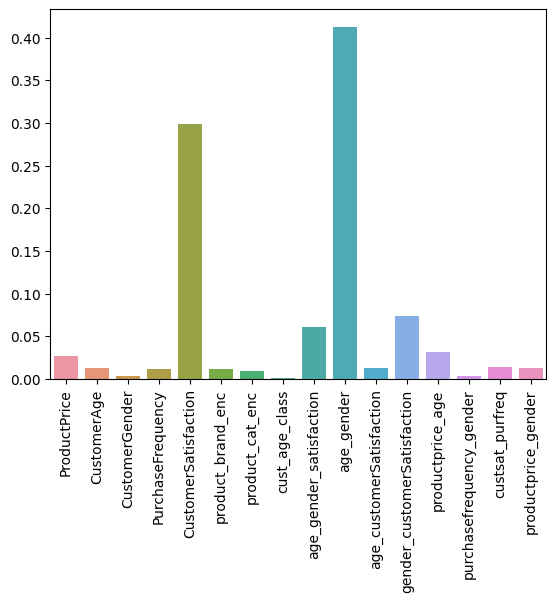

In [86]:
# making plot for feature importance
sns.barplot(x=X.columns, y = dt.feature_importances_)
plt.xticks(rotation=90)

In [87]:
#Random Forest
rf = RandomForestClassifier()
rf.fit(X_sampled, y_sampled)

#predict
y_predict_rf = rf.predict(X_test)

#evaluating
print(classification_report(y_test, y_predict_rf))

print(confusion_matrix(y_test, y_predict_rf))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       780
           1       0.94      0.96      0.95      1020

    accuracy                           0.94      1800
   macro avg       0.94      0.94      0.94      1800
weighted avg       0.94      0.94      0.94      1800

[[715  65]
 [ 44 976]]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'ProductPrice'),
  Text(1, 0, 'CustomerAge'),
  Text(2, 0, 'CustomerGender'),
  Text(3, 0, 'PurchaseFrequency'),
  Text(4, 0, 'CustomerSatisfaction'),
  Text(5, 0, 'product_brand_enc'),
  Text(6, 0, 'product_cat_enc'),
  Text(7, 0, 'cust_age_class'),
  Text(8, 0, 'age_gender'),
  Text(9, 0, 'age_customerSatisfaction'),
  Text(10, 0, 'gender_customerSatisfaction'),
  Text(11, 0, 'productprice_age'),
  Text(12, 0, 'purchasefrequency_gender'),
  Text(13, 0, 'custsat_purfreq'),
  Text(14, 0, 'productprice_gender'),
  Text(15, 0, 'age_gender_satisfaction')])

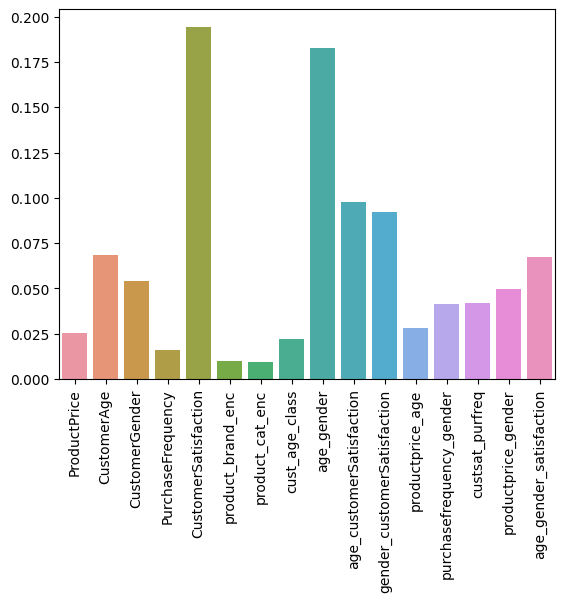

In [138]:
# making plot for feature importance
sns.barplot(x=X.columns, y = rf.feature_importances_)
plt.xticks(rotation=90)

In [88]:
#GaussianNB
nb = GaussianNB()
nb.fit(X_sampled, y_sampled)

#predict
y_predict_nb = nb.predict(X_test)

#evaluating
print(classification_report(y_test, y_predict_nb))

print(confusion_matrix(y_test, y_predict_nb))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       780
           1       0.90      0.84      0.87      1020

    accuracy                           0.86      1800
   macro avg       0.86      0.86      0.86      1800
weighted avg       0.86      0.86      0.86      1800

[[687  93]
 [163 857]]


In [89]:
#KNN
knn = KNeighborsClassifier()
knn.fit(X_sampled, y_sampled)

#predict
y_predict_knn = knn.predict(X_test)

#evaluating
print(classification_report(y_test, y_predict_knn))

print(confusion_matrix(y_test, y_predict_knn))

              precision    recall  f1-score   support

           0       0.69      0.79      0.73       780
           1       0.82      0.72      0.77      1020

    accuracy                           0.75      1800
   macro avg       0.75      0.76      0.75      1800
weighted avg       0.76      0.75      0.75      1800

[[617 163]
 [282 738]]


In [90]:
#Catboost
cb = CatBoostClassifier(verbose=0)
cb.fit(X_sampled, y_sampled)

#predict
y_predict_cb = cb.predict(X_test)

#evaluating
print(classification_report(y_test, y_predict_cb))

print(confusion_matrix(y_test, y_predict_cb))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       780
           1       0.94      0.96      0.95      1020

    accuracy                           0.94      1800
   macro avg       0.94      0.94      0.94      1800
weighted avg       0.94      0.94      0.94      1800

[[715  65]
 [ 43 977]]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'ProductPrice'),
  Text(1, 0, 'CustomerAge'),
  Text(2, 0, 'CustomerGender'),
  Text(3, 0, 'PurchaseFrequency'),
  Text(4, 0, 'CustomerSatisfaction'),
  Text(5, 0, 'product_brand_enc'),
  Text(6, 0, 'product_cat_enc'),
  Text(7, 0, 'cust_age_class'),
  Text(8, 0, 'age_gender_satisfaction'),
  Text(9, 0, 'age_gender'),
  Text(10, 0, 'age_customerSatisfaction'),
  Text(11, 0, 'gender_customerSatisfaction'),
  Text(12, 0, 'productprice_age'),
  Text(13, 0, 'purchasefrequency_gender'),
  Text(14, 0, 'custsat_purfreq'),
  Text(15, 0, 'productprice_gender')])

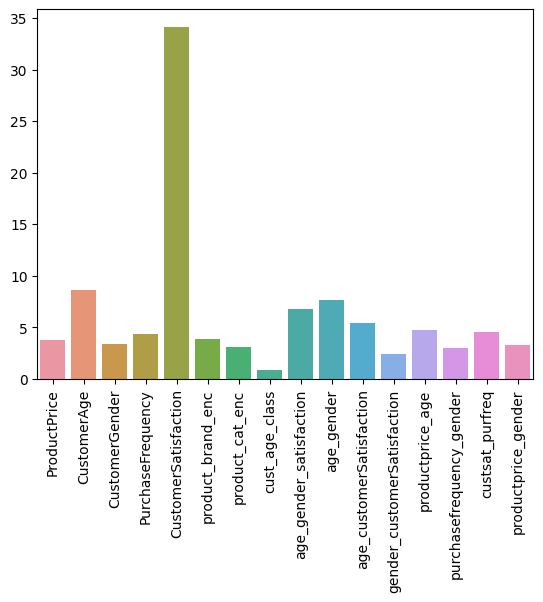

In [91]:
# making plot for feature importance
sns.barplot(x=X.columns, y = cb.feature_importances_)
plt.xticks(rotation=90)

In [93]:
#Xgboost
xgb = XGBClassifier()
xgb.fit(X_sampled, y_sampled)


#predict
y_predict_xgb = xgb.predict(X_test)

#evaluating
print(classification_report(y_test, y_predict_xgb))

print(confusion_matrix(y_test, y_predict_xgb))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       780
           1       0.94      0.96      0.95      1020

    accuracy                           0.94      1800
   macro avg       0.94      0.94      0.94      1800
weighted avg       0.94      0.94      0.94      1800

[[714  66]
 [ 44 976]]


**Inference:** From the Models above we can see that the top performing model are:
1. CatBoost - 0.94 Accuracy, sum error: 108
2. Randomforest - 0.94 Accuracy, sum error: 109
3. Xgboost - 0.94 Accurcay, sum error: 110

### Cross-validating the 3 models

In [145]:
#CatBoost
from sklearn.model_selection import cross_val_score, KFold

# Define K-Fold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(cb, X, y, cv=kfold, scoring='accuracy')

print("Accuracy for each fold:", scores)
print("Mean accuracy:", scores.mean())

Accuracy for each fold: [0.95277778 0.96111111 0.95055556 0.94444444 0.95555556]
Mean accuracy: 0.952888888888889


In [146]:
#RandomForest
from sklearn.model_selection import cross_val_score, KFold

# Define K-Fold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(rf, X, y, cv=kfold, scoring='accuracy')

print("Accuracy for each fold:", scores)
print("Mean accuracy:", scores.mean())

Accuracy for each fold: [0.95277778 0.96055556 0.95055556 0.94333333 0.95388889]
Mean accuracy: 0.9522222222222222


In [147]:
#Xgboost
from sklearn.model_selection import cross_val_score, KFold

# Define K-Fold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(xgb, X, y, cv=kfold, scoring='accuracy')

print("Accuracy for each fold:", scores)
print("Mean accuracy:", scores.mean())

Accuracy for each fold: [0.95       0.95777778 0.94944444 0.94333333 0.95277778]
Mean accuracy: 0.9506666666666665


## Fine-tuning

In [148]:
from sklearn.metrics import accuracy_score

In [149]:
#catboost
import optuna

def objective(trial):
    # Define the range of hyperparameters to be tuned
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.1, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'random_strength': trial.suggest_float('random_strength', 0.1, 10),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
        'verbose': 0
    }

    # Initialize CatBoostClassifier with suggested hyperparameters
    cb_model = CatBoostClassifier(**params, task_type='CPU')  # You can use 'GPU' if available

    # Fit model
    cb_model.fit(X_sampled, y_sampled, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=False)

    # Predict and calculate accuracy
    cb_preds = cb_model.predict(X_test)
    accuracy = accuracy_score(y_test, cb_preds)
    
    # Since Optuna maximizes the objective, return accuracy directly
    return accuracy

In [150]:
# Running the optimization
cb_study = optuna.create_study(direction='maximize')
cb_study.optimize(objective, n_trials=10)

# Print the best hyperparameters and the corresponding accuracy
print("Best parameters:", cb_study.best_params)
print("Best accuracy:", cb_study.best_value)

[I 2024-11-18 00:08:56,652] A new study created in memory with name: no-name-039fccbe-0027-4676-b35e-9a396ebca911
[I 2024-11-18 00:08:57,829] Trial 0 finished with value: 0.94 and parameters: {'iterations': 678, 'depth': 6, 'learning_rate': 0.05221644721946399, 'l2_leaf_reg': 6.163904105684007, 'border_count': 166, 'random_strength': 6.249225809197877, 'bagging_temperature': 0.18699090242471872}. Best is trial 0 with value: 0.94.
[I 2024-11-18 00:08:58,725] Trial 1 finished with value: 0.94 and parameters: {'iterations': 536, 'depth': 6, 'learning_rate': 0.0762892885089227, 'l2_leaf_reg': 3.72273615618914, 'border_count': 145, 'random_strength': 5.82019177316797, 'bagging_temperature': 0.34632863131851577}. Best is trial 0 with value: 0.94.
[I 2024-11-18 00:09:00,737] Trial 2 finished with value: 0.94 and parameters: {'iterations': 525, 'depth': 10, 'learning_rate': 0.057995602271048746, 'l2_leaf_reg': 8.605643116888746, 'border_count': 127, 'random_strength': 4.2306324360110175, 'bagg

Best parameters: {'iterations': 678, 'depth': 6, 'learning_rate': 0.05221644721946399, 'l2_leaf_reg': 6.163904105684007, 'border_count': 166, 'random_strength': 6.249225809197877, 'bagging_temperature': 0.18699090242471872}
Best accuracy: 0.94


fine-tuned parameter

Best parameters: {'iterations': 678, 'depth': 6, 'learning_rate': 0.05221644721946399, 'l2_leaf_reg': 6.163904105684007, 'border_count': 166, 'random_strength': 6.249225809197877, 'bagging_temperature': 0.18699090242471872}
Best accuracy: 0.94

In [151]:
#randomforest
def objective(trial):
    # Define the hyperparameters to tune
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),       # Number of trees
        'max_depth': trial.suggest_int('max_depth', 3, 20),                 # Max depth of each tree
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20), # Minimum samples required to split
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),   # Minimum samples at a leaf
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]), # Number of features per split
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False])  # Whether to use bootstrap sampling
    }

    # Initialize RandomForestClassifier with suggested hyperparameters
    rf_model = RandomForestClassifier(**params, random_state=42)

    # Fit the model on the training data
    rf_model.fit(X_train, y_train)

    # Predict on the validation data and calculate accuracy
    rf_preds = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, rf_preds)

    # Return accuracy, as Optuna aims to maximize this value
    return accuracy


In [152]:
# Running the optimization
rf_study = optuna.create_study(direction='maximize')
rf_study.optimize(objective, n_trials=10)

# Display the best hyperparameters and accuracy
print("Best parameters:", rf_study.best_params)
print("Best accuracy:", rf_study.best_value)

[I 2024-11-18 00:09:49,815] A new study created in memory with name: no-name-bb9e03f6-6474-4fb2-9daf-9da9ffac04cd
[I 2024-11-18 00:10:26,549] Trial 0 finished with value: 0.9383333333333334 and parameters: {'n_estimators': 562, 'max_depth': 16, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': None, 'bootstrap': False}. Best is trial 0 with value: 0.9383333333333334.
[I 2024-11-18 00:10:35,791] Trial 1 finished with value: 0.9388888888888889 and parameters: {'n_estimators': 205, 'max_depth': 8, 'min_samples_split': 14, 'min_samples_leaf': 9, 'max_features': None, 'bootstrap': False}. Best is trial 1 with value: 0.9388888888888889.
[I 2024-11-18 00:10:37,322] Trial 2 finished with value: 0.94 and parameters: {'n_estimators': 138, 'max_depth': 6, 'min_samples_split': 11, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': False}. Best is trial 2 with value: 0.94.
[I 2024-11-18 00:10:39,266] Trial 3 finished with value: 0.94 and parameters: {'n_estimators': 157, 'max_

Best parameters: {'n_estimators': 138, 'max_depth': 6, 'min_samples_split': 11, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': False}
Best accuracy: 0.94


fine-tuned parameters

Best parameters: {'n_estimators': 138, 'max_depth': 6, 'min_samples_split': 11, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': False}
Best accuracy: 0.94

In [164]:
#xgboost
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 1e-6, 1e-1),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-6, 1e-1),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-6, 1e1),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'objective': 'multi:softmax',           # Use multi-class objective
        'num_class': len(set(y))                 # Set number of classes
    }
    
    # Initialize the XGBoost model with params
    xgb_model = XGBClassifier(**params)

    # Fit the model on training data
    xgb_model.fit(X_sampled, y_sampled, eval_set=[(X_test, y_test)], eval_metric='merror', early_stopping_rounds=50, verbose=False)

    # Predict and calculate accuracy
    preds = xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    return accuracy


In [165]:
# Running the optimization
xgb_study = optuna.create_study(direction='maximize')
xgb_study.optimize(objective, n_trials=10)

[I 2024-11-18 00:16:01,882] A new study created in memory with name: no-name-eeac31c7-21c2-4165-8622-391bac5ce4a4
[I 2024-11-18 00:16:02,432] Trial 0 finished with value: 0.94 and parameters: {'n_estimators': 282, 'max_depth': 3, 'learning_rate': 0.09503054158092249, 'subsample': 0.8424248270691422, 'colsample_bytree': 0.7382366592351863, 'gamma': 0.00010504359903750821, 'reg_alpha': 0.0016793673733102048, 'reg_lambda': 0.12239334986096437, 'min_child_weight': 5}. Best is trial 0 with value: 0.94.
[I 2024-11-18 00:16:03,322] Trial 1 finished with value: 0.94 and parameters: {'n_estimators': 629, 'max_depth': 9, 'learning_rate': 0.03915518647619795, 'subsample': 0.8238830619589308, 'colsample_bytree': 0.979383684047624, 'gamma': 1.6942467293326204e-05, 'reg_alpha': 4.081953320299995e-06, 'reg_lambda': 0.002031497197141902, 'min_child_weight': 5}. Best is trial 0 with value: 0.94.
[I 2024-11-18 00:16:03,620] Trial 2 finished with value: 0.94 and parameters: {'n_estimators': 252, 'max_dep

fine-tuned parameters

parameters: {'n_estimators': 240, 'max_depth': 6, 'learning_rate': 0.1126324941187456, 'subsample': 0.8641414528099626, 'colsample_bytree': 0.7612740794257251, 'gamma': 4.015402351641604e-06, 'reg_alpha': 0.008001130781756743, 'reg_lambda': 0.02927879076350724, 'min_child_weight': 5}. Best is trial 0 with value: 0.94.

## Re-training with the fine-tuned parameters

In [166]:
#Catboost
tuned_params =  {'iterations': 678, 
                 'depth': 6, 
                 'learning_rate': 0.05221644721946399, 
                 'l2_leaf_reg': 6.163904105684007, 
                 'border_count': 166, 
                 'random_strength': 6.249225809197877, 
                 'bagging_temperature': 0.18699090242471872,
                 'verbose': 0}

In [167]:
cb = CatBoostClassifier(**tuned_params)

In [168]:
cb.fit(X_sampled, y_sampled)
#predict
y_predict_cb = cb.predict(X_test)

#evaluating
print(classification_report(y_test, y_predict_cb))

print(confusion_matrix(y_test, y_predict_cb))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       780
           1       0.94      0.96      0.95      1020

    accuracy                           0.94      1800
   macro avg       0.94      0.94      0.94      1800
weighted avg       0.94      0.94      0.94      1800

[[714  66]
 [ 43 977]]


In [169]:
#random Forest

tuned_params = {'n_estimators': 138, 
                'max_depth': 6, 
                'min_samples_split': 11, 
                'min_samples_leaf': 2, 
                'max_features': 'log2', 
                'bootstrap': False}

In [170]:
rf = RandomForestClassifier(**tuned_params)

In [171]:
rf.fit(X_sampled, y_sampled)
#predict
y_predict_rf = rf.predict(X_test)

#evaluating
print(classification_report(y_test, y_predict_rf))

print(confusion_matrix(y_test, y_predict_rf))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       780
           1       0.94      0.96      0.95      1020

    accuracy                           0.94      1800
   macro avg       0.94      0.94      0.94      1800
weighted avg       0.94      0.94      0.94      1800

[[715  65]
 [ 43 977]]


### Note: There are other thing to be done to improve our model accuracy. 
### We shall be using the CatBoost Classifier because it has an optimal `error` of `108` and `accuracy` of `94%`

# Model pipelining

In [4]:
df = pd.read_csv('consumer_electronics_sales_data.csv')

In [5]:
df

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,5875,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,5876,Tablets,Samsung,2606.718293,63,0,1,5,1
3,5877,Smartphones,Samsung,870.395450,63,1,10,3,1
4,5878,Tablets,Sony,1798.955875,57,0,17,3,0
...,...,...,...,...,...,...,...,...,...
8995,14869,Smart Watches,Samsung,1041.149163,36,1,16,4,0
8996,14870,Smartphones,Samsung,1485.694311,57,0,5,1,1
8997,14871,Headphones,Samsung,2887.369597,28,0,18,4,0
8998,14872,Tablets,HP,1490.453964,38,0,4,2,1


steps:

import necessary libraries
1. automate your cleaning process. i.e create a function for them
2. automate your preprocessing process. i.e create a function for them
3. automate your feature engineering process. i.e create a function for them
4. create a pipeline transformer for each process
5. join the different processes using ColumnTransformer together
6. create your model object instance
7. join 5 and 6 together using a pipeline

#### 1.we didnt go through any cleaning process so lets proceed.

#### 2. during preprocessing, we only resampled, but thats not necessary anymore, and since we didnt have any outliers in the numeric columns, so no need for scaling, but for learnng purpose will add a scalar, will also do label encoding, either using OneHotEncoder or LabelEncoder.

#### 3. creating feature engineering class.


In [6]:
df = df.drop(columns=['ProductID'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductCategory       9000 non-null   object 
 1   ProductBrand          9000 non-null   object 
 2   ProductPrice          9000 non-null   float64
 3   CustomerAge           9000 non-null   int64  
 4   CustomerGender        9000 non-null   int64  
 5   PurchaseFrequency     9000 non-null   int64  
 6   CustomerSatisfaction  9000 non-null   int64  
 7   PurchaseIntent        9000 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 562.6+ KB


In [8]:
df.columns

Index(['ProductCategory', 'ProductBrand', 'ProductPrice', 'CustomerAge',
       'CustomerGender', 'PurchaseFrequency', 'CustomerSatisfaction',
       'PurchaseIntent'],
      dtype='object')

In [9]:
X = df.drop(columns=['PurchaseIntent'])
y = df['PurchaseIntent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [10]:
num_columns = [ col for col in X.columns if df[col].dtypes in ['int64','float64']]
cat_cols = [ col for col in X.columns if df[col].dtypes in ['object']]

In [11]:
cat_cols

['ProductCategory', 'ProductBrand']

In [12]:
num_columns

['ProductPrice',
 'CustomerAge',
 'CustomerGender',
 'PurchaseFrequency',
 'CustomerSatisfaction']

In [13]:
# assuming the price contain character symbols, then convert to numeric, you will have to include an if statement.
#if df['ProductPrice'].dtypes in ['Object']:
#    df['ProductPrice'] = df['ProductPrice'].replace('[a-zA-Z!@#$%^&*()_+=-{};:"<>,./?]', '', regex=True) # using regular expression to replace inconsistent symbols
#    df['ProductPrice'] = pd.to_numeric(df['ProductPrice'], errors='coerce')
    
#treating d different categories, removing every white space and converting to lower-case
#cat_cols = ['ProductCategory','ProductBrand']
#for i in cat_cols:
#    df[i] = df[i].str.replace(' ','')
#    df[i] = df[i].str.lower()

In [14]:
df

,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,Tablets,Samsung,2606.718293,63,0,1,5,1
3,Smartphones,Samsung,870.395450,63,1,10,3,1
4,Tablets,Sony,1798.955875,57,0,17,3,0
...,...,...,...,...,...,...,...,...
8995,Smart Watches,Samsung,1041.149163,36,1,16,4,0
8996,Smartphones,Samsung,1485.694311,57,0,5,1,1
8997,Headphones,Samsung,2887.369597,28,0,18,4,0
8998,Tablets,HP,1490.453964,38,0,4,2,1


In [15]:
# scaling with standard scalar when outlier 
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

In [16]:
#Now introducing a pipeline for the Scaler
from sklearn.pipeline import Pipeline

In [17]:
#creating a price transformer, since its the continuous numerical column
# Define preprocessing for numerical data
price_numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

price_numerical_transformer

Pipeline(steps=[('scaler', StandardScaler())])

In [18]:
# creating a pipeline for the encoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [19]:
# Defining preprocessing for categorical features: remember we have just two categorical features; 'ProductCategory','ProductBrand'
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
categorical_transformer

Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [20]:
# now lets create a class, i.e a customer Transformer class for the feature engineering.
# we need to inherit from BaseEstimator class and TransformerMixin, it helps us to make custom transformation during pipeline

from sklearn.base import BaseEstimator, TransformerMixin

In [21]:
class FeatureEngineering(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return self.feature_eng(X)

    @staticmethod
    def feature_eng(df):
        # engineering the numerical features
        #age, gender, satisfaction interaction
        df['age_gender_satisfaction'] = df['CustomerAge'] + df['CustomerGender'] + df['CustomerSatisfaction']
        
        #age and gender interaction
        df['age_gender'] = df['CustomerAge'] * df['CustomerGender']
        
        #age and customerSatisfaction interaction
        df['age_customerSatisfaction'] = df['CustomerAge'] * df['CustomerSatisfaction']
        
        #gender and customerSatisfaction interaction
        df['gender_customerSatisfaction'] = df['CustomerGender'] * df['CustomerSatisfaction']
        
        #age and Productprice interaction
        df['productprice_age'] =  df['ProductPrice'] * df['CustomerAge']
        
        #purchasefrequency and gender interaction
        df['purchasefrequency_gender'] = df['CustomerGender'] * df['PurchaseFrequency']
        
        #customersatisfaction and Purchase frequency
        df['custsat_purfreq'] = df['CustomerSatisfaction'] * df['PurchaseFrequency']
        
        #producprice and gender interaction
        df['productprice_gender'] = df['ProductPrice'] * df['CustomerGender']
        
        return df

In [22]:
# Define preprocessing for the precessing and cleaning
numerical_transformer_feature_engineering = Pipeline(steps=[
    ('feature_engineering', FeatureEngineering())
])

numerical_transformer_feature_engineering

Pipeline(steps=[('feature_engineering', FeatureEngineering())])

In [23]:
#joining the different Trandformers pipeline, we should import ColumnTransformer from sklearn.compose
from sklearn.compose import ColumnTransformer # this is use to combine all the transformers withe their respective columns
preprocessor = ColumnTransformer(
    #initiating the transformers
    transformers=[
    # you must put the sequentially
    ('encoder', categorical_transformer, cat_cols),
    ('feat_enginering', numerical_transformer_feature_engineering, num_columns), #the transformer and the columns which is X_train.columns or u could just list the columns
    ('price_scaler',price_numerical_transformer, ['ProductPrice'])
    ])

In [24]:
preprocessor

ColumnTransformer(transformers=[('encoder',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['ProductCategory', 'ProductBrand']),
                                ('feat_enginering',
                                 Pipeline(steps=[('feature_engineering',
                                                  FeatureEngineering())]),
                                 ['ProductPrice', 'CustomerAge',
                                  'CustomerGender', 'PurchaseFrequency',
                                  'CustomerSatisfaction']),
                                ('price_scaler',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['ProductPrice'])])

In [26]:
from catboost import CatBoostClassifier

In [27]:
# creating an instance of your model
cb = CatBoostClassifier(verbose=0)

In [28]:
# creating a pipeline for your model and the preprocessor
pipeline = Pipeline(steps=[ # remember everything should be in steps
    ('preprocessor', preprocessor),  
    ('classifier', cb)
])

In [29]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('encoder',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ProductCategory',
                                                   'ProductBrand']),
                                                 ('feat_enginering',
                                                  Pipeline(steps=[('feature_engineering',
                                                                   FeatureEngineering())]),
                                                  ['ProductPrice',
                                                   'CustomerAge',
                                                   'CustomerGender',
                                                   'PurchaseFrequency',
                                                   'CustomerSatisfaction']),
                                                 ('price_scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['ProductPrice'])])),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x0000025B90927990>)])

In [30]:
#fitting our X_train, y_train into our pipeline
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('encoder',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ProductCategory',
                                                   'ProductBrand']),
                                                 ('feat_enginering',
                                                  Pipeline(steps=[('feature_engineering',
                                                                   FeatureEngineering())]),
                                                  ['ProductPrice',
                                                   'CustomerAge',
                                                   'CustomerGender',
                                                   'PurchaseFrequency',
                                                   'CustomerSatisfaction']),
                                                 ('price_scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['ProductPrice'])])),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x0000025B90927990>)])

In [31]:
pipeline.predict(X_test)

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [38]:
### Extracting the model
import cloudpickle

with open('Con_Elec_pipeline.joblib', 'wb') as file:
    cloudpickle.dump(pipeline, file)

In [39]:
with open('Con_Elec_pipeline.joblib', 'rb') as file:
    model = joblib.load(file)

In [40]:
model.predict(X_test)

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [41]:
## save d productcategory and productbrand into a txt file

In [42]:
cat_cols

['ProductCategory', 'ProductBrand']

In [43]:
df.ProductCategory.unique()

array(['Smartphones', 'Smart Watches', 'Tablets', 'Laptops', 'Headphones'],
      dtype=object)

In [44]:
for col in cat_cols:
    with open(f"{col}_data.txt", 'w') as file:
        for prod in df[col].unique():
            file.write(f'{prod}\n')
        

In [52]:
with open('ProductCategory_data.txt', 'r') as file:
    productcat = [ line.strip().strip("'") for line in file.readlines()]

In [51]:
productcat

['Smartphones\n', 'Smart Watches\n', 'Tablets\n', 'Laptops\n', 'Headphones\n']

In [53]:
with open(f"CustomerGender_data.txt", 'w') as file:
    for genda in df['CustomerGender'].unique():
        file.write(f'{genda}\n')